In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
doubles = glob.glob("results/data_cpu/double*.dat")
floats = glob.glob("results/data_cpu/float*.dat")

In [3]:
def params_from_fn(fn):
    m = re.match('(.+?)_p(.+?)_n(.+?).dat', fn.split('\\')[-1])
    p = m.group(2)
    n = m.group(3)
    return p, n

In [4]:
doubles_p = [params_from_fn(_) for _ in doubles]
floats_p = [params_from_fn(_) for _ in floats]

In [5]:
doubles_d = [np.loadtxt(_, delimiter=', ') for _ in doubles]
floats_d = [np.loadtxt(_, delimiter=', ') for _ in floats]

In [6]:
doubles_t = np.array([np.mean(_[10:,:], axis=0) for _ in doubles_d])
floats_t = np.array([np.mean(_[10:,:], axis=0) for _ in floats_d])

In [7]:
doubles_m = np.array([np.min(_, axis=0) for _ in doubles_d])
floats_m = np.array([np.min(_, axis=0) for _ in floats_d])

In [8]:
doubles_dt = np.array([np.std(_[10:,:], axis=0) for _ in doubles_d])
floats_dt = np.array([np.std(_[10:,:], axis=0) for _ in floats_d])

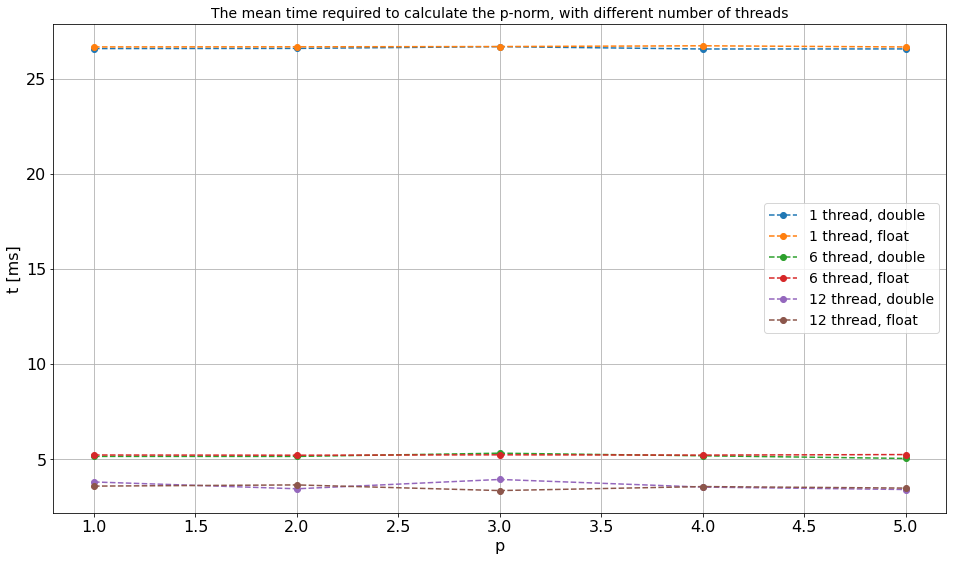

In [9]:
plt.figure(figsize=(16, 9))
plt.plot([1, 2, 3, 4, 5], doubles_t[:, 0], 'o--', label='1 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_t[:, 0], 'o--', label='1 thread, float')
plt.plot([1, 2, 3, 4, 5], doubles_t[:, 5], 'o--', label='6 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_t[:, 5], 'o--', label='6 thread, float')
plt.plot([1, 2, 3, 4, 5], doubles_t[:, 11], 'o--', label='12 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_t[:, 11], 'o--', label='12 thread, float')
plt.legend(fontsize=14)
plt.xlabel('p', fontsize=16)
plt.ylabel('t [ms]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('The mean time required to calculate the p-norm, with different number of threads', fontsize=14)
plt.savefig('results/p_vs_t_cpu_mean.png')

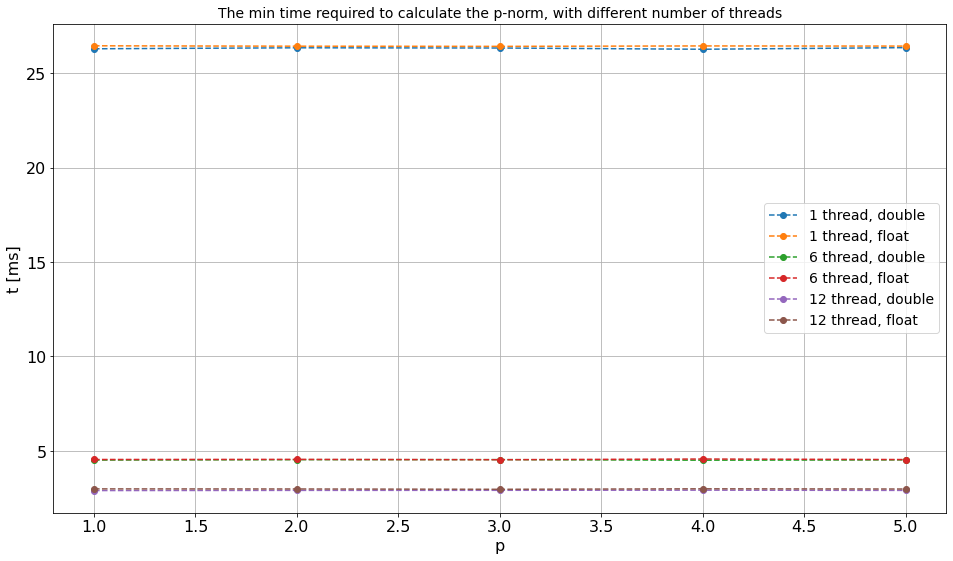

In [10]:
plt.figure(figsize=(16, 9))
plt.plot([1, 2, 3, 4, 5], doubles_m[:, 0], 'o--', label='1 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_m[:, 0], 'o--', label='1 thread, float')
plt.plot([1, 2, 3, 4, 5], doubles_m[:, 5], 'o--', label='6 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_m[:, 5], 'o--', label='6 thread, float')
plt.plot([1, 2, 3, 4, 5], doubles_m[:, 11], 'o--', label='12 thread, double')
plt.plot([1, 2, 3, 4, 5], floats_m[:, 11], 'o--', label='12 thread, float')
plt.legend(fontsize=14)
plt.xlabel('p', fontsize=16)
plt.ylabel('t [ms]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('The min time required to calculate the p-norm, with different number of threads', fontsize=14)
plt.savefig('results/p_vs_t_cpu_min.png')

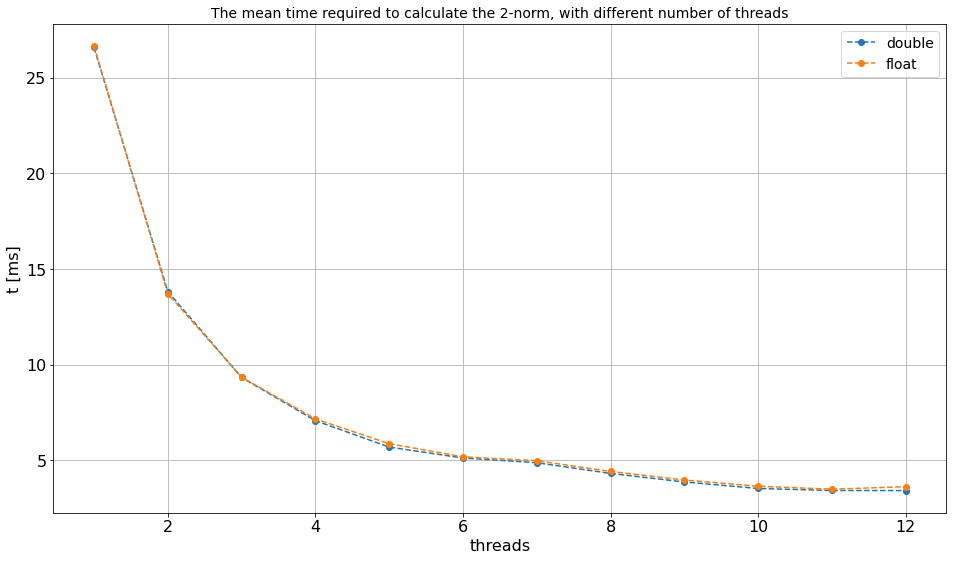

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1, 13), doubles_t[1, :], 'o--', label='double')
plt.plot(np.arange(1, 13), floats_t[1, :], 'o--', label='float')
plt.legend(fontsize=14)
plt.xlabel('threads', fontsize=16)
plt.ylabel('t [ms]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('The mean time required to calculate the 2-norm, with different number of threads', fontsize=14)
plt.savefig('results/thread_vs_t_cpu_mean.png')

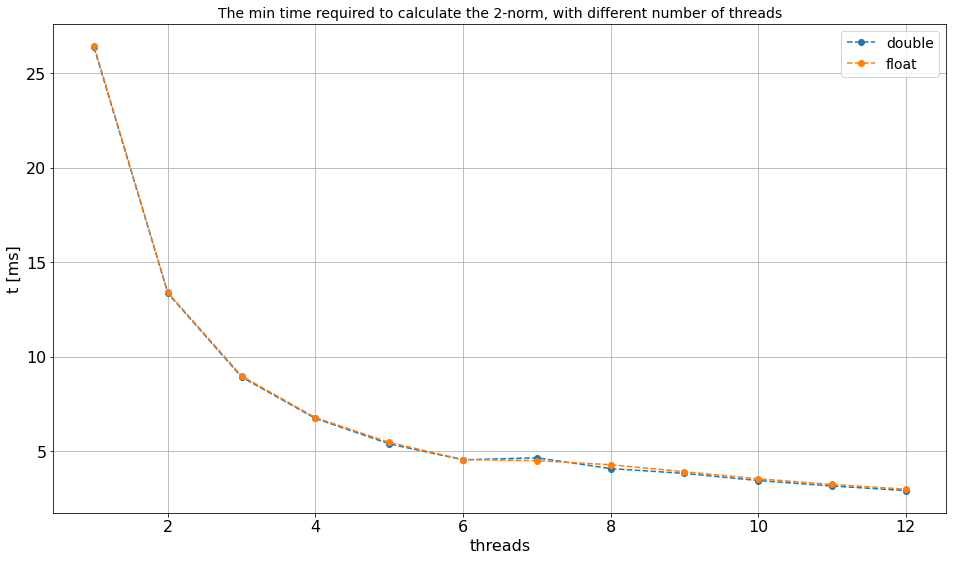

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1, 13), doubles_m[1, :], 'o--', label='double')
plt.plot(np.arange(1, 13), floats_m[1, :], 'o--', label='float')
plt.legend(fontsize=14)
plt.xlabel('threads', fontsize=16)
plt.ylabel('t [ms]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.title('The min time required to calculate the 2-norm, with different number of threads', fontsize=14)
plt.savefig('results/thread_vs_t_cpu_min.png')